# **MIE1513: Final Project**
### Submission date: April 20, 2020 at 23:59pm

-------------

## Academic Integrity Declaration:
In submitting this assessment, I confirm that my conduct during this project adheres to the Code of Behaviour on Academic Matters. I confirm that I have not acted in such a way that would constitute cheating, misrepresentation, or unfairness, including but not limited to, using unauthorized aids and assistance, impersonating another person, and committing plagiarism. I pledge upon my honour that I have not violated the Faculty of Applied Science & Engineering’s Honour Code during this assessment.

-------------


## Part 1: Data Loading

### (a) Load the provided dataset (reddit_data.json)

In [1]:
! pip install colorlover
! pip install networkx
! pip install plotly
!pip install wordcloud

In [215]:
import pandas as pd
import numpy as np

#progress bar
from tqdm import tqdm

#Plot
import matplotlib.pyplot as plt

# vis
from IPython.display import HTML
import colorlover as cl
import networkx as nx
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go

from wordcloud import WordCloud

import seaborn as sns

#random
import random

#counter
from collections import Counter

#Datetime
from datetime import datetime

#nlp
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import RegexpTokenizer
nltk.download('vader_lexicon')
nltk.download("averaged_perceptron_tagger")


#ml
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import xgboost as xgb

#stats
from scipy import stats

#sentiment analysis 
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
random.seed(10)

In [0]:
data_all = pd.read_json("reddit_data.zip", orient='records', lines=True)
data_all = data_all[["id", "author", "created_utc", "subreddit", "title", "num_comments", "score", "selftext", "url"]]

In [5]:
pd.set_option('display.max_colwidth',-1)
data_all.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,abcupx,WithGravy,1546300839,gaming,What are some game games to enjoy on a low-end laptop?,31,3,"Got a new laptop and want to enjoy some games on it. Currently own Stardew Valley, Undertale, and Half Life.",https://www.reddit.com/r/gaming/comments/abcupx/what_are_some_game_games_to_enjoy_on_a_lowend/
1,abcuz2,mikebeingfrank,1546300881,pics,"In 1964, an average wage worker had to clock 823 hours to afford a Programma 101, the first commercial pc. In 2014? Only 34 hours to for a Macbook Air, a mind-bogglingly better comouter. That's a reduction of 94%.",4,5,,https://i.redd.it/j6rqqthwcp721.jpg
2,abcv1a,[deleted],1546300892,worldnews,"India: Chinese woman, 25, on solo trip to Khajuraho raped",13,23,,https://timesofindia.indiatimes.com/city/agra/chinese-woman-25-on-solo-trip-to-khajuraho-raped/articleshow/67328570.cms
3,abcv5v,Lucious-Lyon,1546300914,AskReddit,[Serious] American Liberals of Reddit: Without any sarcasm; What is one thing nice and positive you can say about Donald Trump?,76,0,[removed],https://www.reddit.com/r/AskReddit/comments/abcv5v/serious_american_liberals_of_reddit_without_any/
4,abcv7f,sandollars,1546300923,worldnews,"According to the Fiji Government, the Australian Terrorist Recently Made Stateless Has Never Been to Fiji",21,13,,http://fijisun.com.fj/2019/01/01/vuniwaqa-prakash-not-a-fijian-citizen/


### (b)	Generate your unique subset of the data

**Make sure you update unique_string with your email address**

In [0]:
# DO NOT CHANGE THE FUNCTION BELOW
def getMySubreddits(data, my_str):
    assert my_str != "", "You must fill in your unique string"
    import random
    subreddits = sorted(data["subreddit"].unique().tolist())
    rng = random.Random(my_str)
    return rng.sample(subreddits, 4)

In [7]:
# Fill in your UofT email in the variable unique_string below
unique_string = "chu.chu@mail.utoronto.ca" 
my_subreddits = getMySubreddits(data_all, unique_string)
print("My subreddits:", my_subreddits)

My subreddits: ['politics', 'nba', 'soccer', 'todayilearned']


In [0]:
data = data_all[data_all["subreddit"].isin(my_subreddits)]

In [9]:
data.head()

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
10,abcvk9,[deleted],1546300986,todayilearned,"TIL the IRS spent nearly $11 million on guns, ammunition and military-style equipment. That’s nearly $5,000 in gear for each agent.",0,1,[deleted],https://www.wsj.com/articles/why-does-the-irs-need-guns-1466117176
16,abcvzx,bornfromblue,1546301066,nba,Spurs' Gay out vs. Celtics with injured wrist,12,11,,http://www.espn.com/nba/story/_/id/25657654/rudy-gay-san-antonio-spurs-vs-boston-celtics-injured-wrist
26,abcwzf,[deleted],1546301245,soccer,Is the winter transfer window officially open?,0,1,[removed],https://www.reddit.com/r/soccer/comments/abcwzf/is_the_winter_transfer_window_officially_open/
29,abcx6g,chrisaed,1546301283,todayilearned,"TIL that America had a period where “Fly In Drive Ins” popped up. A place where both cars and airplanes were able to park to watch a movie. New Jersey in 1948, Edward Brown Jr, a Former Navy Pilot during WW2 opened the first. Allowing 500 cars plus a runway and parking area for pilots.",2,88,,http://cinematreasures.org/theaters/8593
30,abcx6p,Consinneration,1546301284,todayilearned,"TIL If Andromeda reflected more light, it would be visible to the naked eye six times the size of the moon.",14,25,,https://waitbutwhy.com/2014/06/andromeda-brighter-youd-see.html


In [10]:
data.describe()

,created_utc,num_comments,score
count,4.889100e+04,48891.000000,48891.000000
mean,1.547687e+09,71.168968,791.815160
std,7.662962e+05,370.034335,4614.299847
min,1.546301e+09,0.000000,0.000000
25%,1.547042e+09,2.000000,1.000000
50%,1.547696e+09,11.000000,13.000000
75%,1.548349e+09,35.000000,103.000000
max,1.548979e+09,30192.000000,125751.000000


## Part 2: Exploratory Data Analysis
###(a) Subreddit Labels
As is shown in Figure 1, the subreddit labels are imbalanced. There are 17210 posts for 'politics', which is the most popular one, 14859 for 'soccer', and 13598 for 'todayilearned'. 'nba' is the least popular topic among the four, which has 3224 posts.

In [11]:
data['subreddit'].value_counts()

politics         17210
soccer           14859
todayilearned    13598
nba              3224 
Name: subreddit, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

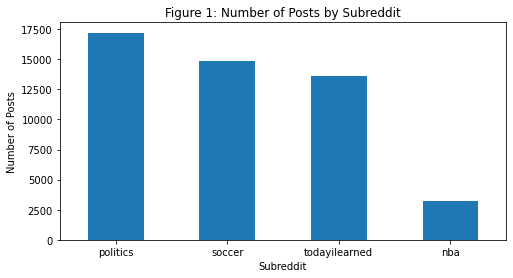

In [12]:
plt.figure(figsize=(8,4))
data['subreddit'].value_counts().plot(kind='bar')
# data.groupby('subreddit').count().plot(kind='bar')
plt.title("Figure 1: Number of Posts by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)

### (b) Column: id
I explored the id column to see if there is any noticeable pattern for each subreddit. It seems like there is no specific pattern related to the subreddit because for each topic, the id all starts with 'abc' and ends with 'alv' as the first three characters, with three alphanumeric letters as the last three letters.

In [13]:
data[data['subreddit'] == 'politics'].id

38        abcxqs
76        abd0i1
118       abd3t5
175       abd79p
181       abd7qs
           ...  
226216    alvst3
226221    alvt08
226222    alvt11
226226    alvtb7
226227    alvtgd
Name: id, Length: 17210, dtype: object

In [14]:
data[data['subreddit'] == 'nba'].id

16        abcvzx
290       abdfih
325       abdhso
336       abdili
342       abdixo
           ...  
226073    alviqi
226080    alvj3l
226095    alvkae
226219    alvsz8
226235    alvtu8
Name: id, Length: 3224, dtype: object

In [15]:
data[data['subreddit'] == 'soccer'].id

26        abcwzf
101       abd2hv
131       abd4n5
198       abd8xd
245       abdc6a
           ...  
226207    alvs49
226229    alvti3
226230    alvtk5
226231    alvtlf
226233    alvttb
Name: id, Length: 14859, dtype: object

In [16]:
data[data['subreddit'] == 'todayilearned'].id

10        abcvk9
29        abcx6g
30        abcx6p
44        abcydq
45        abcygf
           ...  
226114    alvlno
226123    alvm18
226125    alvm7z
226194    alvra2
226212    alvsh3
Name: id, Length: 13598, dtype: object

###(c) Column: Author
1. ***Author Distribution***: I explored author distribution with a histogram. ['deleted'] was removed because the count of '[deleted]' author is 11293, an outlier/ null value much greater than any existing authors. As is shown in Figure 2, most authors posted 1-10 posts. As is shown in Figure 3, the maximum number of posts an author has is 911. The subreddit of 'todayilearned" has the largest number of authors, whereas authors of the subreddit of "politics" and "soccer" are fewer than 'todayilearned' but they are more engaged. Authors of 'nba' are a relatively small group and do not post as much. 
2. ***Relationship Between the Author and Subreddit with Preference Table***: In an effor to see the relationship between the author and subreddit, I decided to eliminate the author with number of posts less than and including 2 as 75% percentile is 2. The rest authors are considered "productive'. To see each productive author's perference for certain subreddit, I created a table to show the percentage of subreddit that the author mostly posted about. Te result further prooves that 'soccer' and 'politics' authors are the most and second most enthusiatic and hardly engaged in other subreddit. There are a few 'todayilearned' top productive authors and most of them are also engaged in other subreddit. 
![alt text](https://drive.google.com/uc?id=1ldI2yaqI95u3pELRcPdQiQDytIya6Jt-)
3. ***Relationship Between the Author and Subreddit with Scatter Graph***: 
* Size of the node: number of posts
* Color of the node: numbe of authors 
* Size and color of the link: number of shared authors

'politics' and 'todayilearned' have the most shared authors. 'nba' and 'politics' have the fewest shared authors. 
For each node, the node that has the most shared authors with is as follows:

'nba' -- 'soccer': 32

'politics' -- 'todayilearned': 160

'soccer' -- 'todayilearned' 45

'todayilearned' -- 'politics': 160
![alt text](https://drive.google.com/uc?id=1da5PRa8jzjss9zVQGfCGqfdr7HUa82bV)





####1. Author Distribution



In [17]:
data['author'].value_counts().sort_values(ascending=False)

[deleted]         11293
Meladroit40       911  
Gungerz           301  
MatchThreadder    251  
Warcrocco         245  
                 ...   
Bradybeee         1    
WhiteCatHeat      1    
deij              1    
TallTom311        1    
Seriste           1    
Name: author, Length: 15820, dtype: int64

(array([1.5266e+04, 3.2600e+02, 1.0800e+02, 2.7000e+01, 3.3000e+01,
        2.1000e+01, 1.6000e+01, 8.0000e+00, 3.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

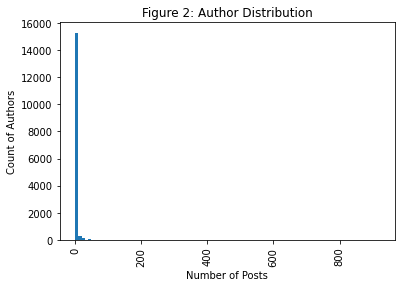

In [18]:
bins_list=[i*10 for i in range(93)]
dataCopy = data[data['author']!='[deleted]'] #dataCopy remove '[deleted]
author = pd.DataFrame(dataCopy['author'].value_counts())
plt.title("Figure 2: Author Distribution")
plt.xlabel("Number of Posts")
plt.ylabel("Count of Authors")
plt.xticks(rotation=90)
plt.hist(author['author'], bins=bins_list)

As is shown in Figure 2, the author distribution is highly right skewed with a predominant 1-10 posts as the majority number of posts that the authors posted. 15266 out of 48891 authors posted 1-10 posts. Number of authors with 11-20 posts nosedives to 326.

In [19]:
author.head()

,author
Meladroit40,911
Gungerz,301
MatchThreadder,251
Warcrocco,245
no_idea-to_nick,214


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

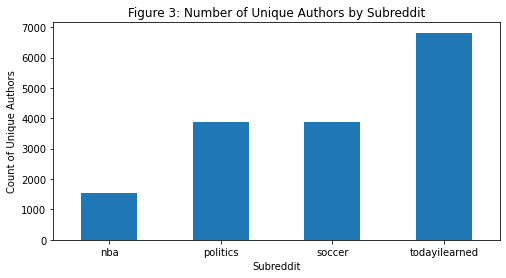

In [20]:
plt.figure(figsize=(8,4))
Plot = pd.DataFrame(dataCopy.groupby('subreddit').author.unique())
l = [len(i) for i in Plot['author'].values]
Plot['author']= l
Plot['author'].plot(kind='bar')

plt.title("Figure 3: Number of Unique Authors by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Count of Unique Authors")
plt.xticks(rotation=0)

In [21]:
Plot['postsPerAthor'] = dataCopy.groupby('subreddit').id.count()/Plot['author'].values
Plot

,author,postsPerAthor
subreddit,,
nba,1524,1.599081
politics,3882,3.716383
soccer,3879,2.929105
todayilearned,6816,1.375000


In contrast to Figure 1, where 'politics' and 'soccer' received the most posts, Figure 2 shows that there are fewer authors that posted about 'politics' and 'soccer' than 'todayilearned'. This figure and the table above show that authors of 'politics' and 'soccer' are more engaged than 'todayileared'. Authors of 'nba' are a relatively small group and do not post as much. On average, authors of 'politics' and 'soccer' posted 3.7 and 2.9 posts whereas authors of 'nba' and 'todayilearned' posted 1.60 and 1.37 posts. 

####2. Relationship between the Author and Subreddit with Preference Table

In [22]:
author['author'].describe()

count    15819.000000
mean     2.376762    
std      9.899829    
min      1.000000    
25%      1.000000    
50%      1.000000    
75%      2.000000    
max      911.000000  
Name: author, dtype: float64

In [23]:
#dataCopy remove author with less than and equal to 2 posts
author = author[author['author']>2]
pAuthor = author.index #productive author

for (au) in tqdm(dataCopy[['author']].itertuples(index=False)):
    if au not in pAuthor:
        dataCopy = dataCopy[dataCopy['author']!=au] #dataCopy remove author with less than and equal to 2 posts

37598it [13:27, 46.55it/s]


In [24]:
#create a dictionary: {authorname: {subredit: number of posts}}
def highestPercentage(dataframe):

    authorDic={}
    for (index,author,sub) in tqdm(dataframe[['author','subreddit']].itertuples()):
        if author not in authorDic:
            authorDic[author]={}
            authorDic[author][sub]=1
        else:
            if sub not in authorDic[author]:
                authorDic[author][sub]=1
            else:
                authorDic[author][sub]+=1
    return authorDic

authorDic = highestPercentage(dataCopy)

37598it [00:00, 515484.20it/s]


In [25]:
authorDic

{'bornfromblue': {'nba': 5},
 'chrisaed': {'todayilearned': 8},
 'Consinneration': {'todayilearned': 1},
 'corginamedzelda': {'politics': 20},
 'vivek1612': {'todayilearned': 1},
 'ChaseDonovan': {'politics': 11, 'todayilearned': 54},
 'Zogshiloh': {'todayilearned': 1},
 'tehngand': {'todayilearned': 1},
 'Gordalini': {'soccer': 1},
 'pinkomegajoj': {'todayilearned': 1},
 'WarOfNoise': {'politics': 5, 'todayilearned': 1},
 'formeraide': {'politics': 28, 'todayilearned': 1},
 'kidfutty': {'soccer': 1},
 'BlankVerse': {'politics': 10},
 'TowelCarryingTourist': {'politics': 33},
 'ButteryMoleHole': {'soccer': 1},
 'NotaNotSee': {'politics': 27, 'todayilearned': 1},
 'EtOHMartini': {'todayilearned': 13},
 'dudESDUDes1': {'soccer': 1},
 'lodestar_resistance': {'politics': 11},
 'dumutter': {'todayilearned': 3},
 'HuangZhou': {'soccer': 3},
 'Peugeot905': {'nba': 2},
 'AustSakuraKyzor': {'todayilearned': 1},
 'Shirowoh': {'politics': 3, 'soccer': 1},
 'Perfect_Gas': {'politics': 15},
 'KeyDo

In [26]:
#build a preference table
b_list=[]
pref_list=[]

def preference(dic):

    for (index,au) in author[['author']].itertuples(index=True):
        subs = dic[index] 
        b = max(subs.values())/sum(subs.values())
        b_list.append(b)
        for v,k in enumerate(subs):
            if v == max(subs.values()):
               break
        pref_list.append(k) 
    return b_list, pref_list


b_list, pref_list = preference(authorDic)

a = pd.Series(author.index)
b = pd.Series(b_list)
c = pd.Series(pref_list)

prefTable = pd.concat([a,b,c], axis=1)
prefTable.columns=['author','percentage','preferedSubreddit']
prefTable.index = prefTable.author
prefTable = pd.concat([prefTable,author['author']], axis=1)
prefTable.columns=['author','percentage','preferedSubreddit','numberOfPost']
prefTable = prefTable[['percentage','preferedSubreddit','numberOfPost']]
prefTable.head(50)

,percentage,preferedSubreddit,numberOfPost
author,,,
Meladroit40,1.000000,soccer,911
Gungerz,1.000000,soccer,301
MatchThreadder,1.000000,soccer,251
Warcrocco,1.000000,soccer,245
no_idea-to_nick,1.000000,soccer,214
Sarah_NEW,1.000000,todayilearned,183
Alessio_Romagnoli13,1.000000,soccer,113
DriesMertens,1.000000,soccer,113
RyanSmith,1.000000,politics,95


This table shows the top 50 most productive authors' preferred subreddit and its percentage that the author mostly posted about. The top most productive authors all belong to 'soccer' and they devoted 100% posts to talking about 'soccer'. 'politics' authors are the second most euthusiastic. Most of them also devoted 100% posts to talking about 'politics'. 'todayilearned' authors are less euthusiatic and more likely to talk about other subreddit. 'nba' authors are not engaged.

####3. Relationship Between the Author and Subreddit with Scatter Graph

In [0]:
HTML(cl.to_html( cl.scales['9'] ))

# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['Oranges']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

#create a dictionary for subreddit and authors posted about the subreddit
df = pd.DataFrame(dataCopy.groupby('subreddit').author.unique())
graphDict = {}
for (sub, author) in df.itertuples(index=True):
    graphDict[sub] = author

#create a shared author dictionary
sharedAuthorDict = {}
for k,v in graphDict.items():
    sharedAuthorDict[k] = {}
    for k1,v1 in graphDict.items():
        if k != k1:
          # print(k,k1)
            if k1 not in sharedAuthorDict[k]:
                sharedAuthorDict[k][k1] = set(graphDict[k1])&set(graphDict[k])

In [28]:
graphDict

{'nba': array(['bornfromblue', 'Peugeot905', 'seether18', ..., 'Trevor-Joseph',
        'jerryjefftrainsongs', 'NecessaryPrinciple'], dtype=object),
 'politics': array(['corginamedzelda', 'formeraide', 'BlankVerse', ..., 'dmgctrl',
        'Wingstop123', 'ovirt001'], dtype=object),
 'soccer': array(['Gordalini', 'kidfutty', 'ButteryMoleHole', ..., 'Kapranos',
        'MrSqueegee95', 'ibecharlie'], dtype=object),
 'todayilearned': array(['chrisaed', 'Consinneration', 'vivek1612', ..., 'annieme',
        'cheeseburgerwaffles', 'bulgogi1970'], dtype=object)}

In [29]:
sharedAuthorDict

{'nba': {'politics': {'2327INF101ABN',
   'CSGOW1ld',
   'Downisthenewup87',
   'Helicase21',
   'PM_me_your_pee_video',
   'SuccessfulOperation',
   'babbagack',
   'catfigplz',
   'dannylenwinn',
   'g_mo821',
   'nolesfan2011',
   'randalflagg'},
  'soccer': {'94savage',
   'Android1618033988',
   'ButLonzoDefendedWell',
   'DATZOOMYBOI',
   'EdHamden',
   'Ema919',
   'IdRatherBeLurking',
   'ImRBJ',
   'JCBDoesGaming',
   'Jayveesac',
   'JesusShuttlesworth96',
   'Kristjanmalva45',
   'Nosalis2',
   'Prince_Monty',
   'Ps3FifaCfc95',
   'Rpollu',
   'Speakitout001',
   'TheWhisperingDeath',
   'Weed233',
   'batman_is_dull',
   'bec_SPK',
   'elraoui',
   'larcenistxd',
   'lujobson',
   'ninjaturtle145',
   'nolesfan2011',
   'red_right_hand_',
   'ronaldo119',
   'stud_macha',
   'thealternateopinion',
   'top3bot',
   'wttd40'},
  'todayilearned': {'Accaznthoisitta',
   'B0NERSTORM',
   'DelonWright',
   'I_Like_Cats_CR',
   'Mexter-Dorgan',
   'PM_me_your_pee_video',
   'Snug

In [0]:
def plotNetworkPage(sharedAuthorDict): #size for number of posts, deep color for more unique authors; 
#size and color of lines for number of shared author 
    #max edge, min edge
    edgeList=[]
    for k,v in sharedAuthorDict.items():
        for k1,v1 in sharedAuthorDict[k].items():
            edgeList.append(len(v1))
    maxEdge, minEdge = max(edgeList), min(edgeList)
    
    #minColor, maxColor
    minColor = 1524
    maxColor = 6816 

    nodeList=[]
    scatters=[]
    
    #position
    posDict = dict((node, 
              (random.gauss(0,10),random.gauss(0,10))) for node in my_subreddits)

    for k,v in sharedAuthorDict.items():
        for k1,v1 in sharedAuthorDict[k].items():
            if {k,k1} not in nodeList:
                nodeList.append({k,k1})

                edgeWidth = len(v1)/50
                edgeColor = int(299*(edgeWidth-minEdge)/(maxEdge-minEdge))
                print('The shared author between',k,'and',k1,'is %d.'% len(v1))
                      
                x0, y0 = posDict[k]
                x1, y1 = posDict[k1]

                # postDict[k1] = (x1,y1)dictionary for four subreddit 

                s = Scatter(
                    x=[x0, x1],
                    y=[y0, y1],
                    mode='lines', 
                    line=scatter.Line(width=edgeWidth,color=purd300[edgeColor]))
                scatters.append(s)

    for node in my_subreddits:

         nodeColor=int(Plot[Plot.index==node].author.values) #number of authors
         size=int(dataCopy.groupby('subreddit').id.count()[node])/200
        #  print(size)
         degreeColor=int(299*(nodeColor-minColor)/(maxColor-minColor)) #normalize
         xPos, yPos = posDict[node]
         s = Scatter(
             x=[xPos], 
             y=[yPos],
             text=node+'<br>'+'Number of Posts:'+str(size*200)+ '<br>'+"Number of Authors:"+str(nodeColor),
             mode='markers',
             marker=dict(
                    color=purd300[degreeColor], 
                    size=size, 
                    line=dict(width=2)))
         scatters.append(s)

    layout = Layout(showlegend=False,
                    plot_bgcolor = 'rgba(0,0,0,0.1)')
      
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)
                

In [129]:
random.seed(10)
init_notebook_mode(connected=True)
configure_plotly_browser_state()
plotNetworkPage(sharedAuthorDict)

The shared author between nba and politics is 12.
The shared author between nba and soccer is 32.
The shared author between nba and todayilearned is 15.
The shared author between politics and soccer is 25.
The shared author between politics and todayilearned is 160.
The shared author between soccer and todayilearned is 45.


As is shown in this figure (Figure 4), the nodes are subreddit and the links represent the shared authors between the nodes. The size of the node represents the number of posts related to the subreddit. The color of the node reresents the number of authors who posted about the subreddit (more author, darker). The width and color of the link represent the number of shared authors between the subreddits.


'politics' and 'todayilearned' have the most shared authors. 'nba' and 'politics' have the fewest shared authors. Authors who posted about 'soccer' posted the most about 'todayilearned' other than 'soccer', and posted the least about 'politics'. Authors who posted about 'todayilearned' posted the least about 'nba'. Authors who posted about 'nba' posted the most about 'soccer' other than 'nba'.

###(D) Column: created_utc
1. The time period of this dataset is from Jan 1, 2019 to Jan 31, 2019.
2. There is an observeable similar pattern on the 'politics', 'todayilearned' and 'nba' trends. The peak posting dates are usually weekends. 'soccer' shows an opposite trends. 
3. There is an observeable similar pattern on all of the subreddits except that it seems like 'nba' authors are more active from 2am to 5am than authors of other subreddits. 

In [32]:
#convert utc to local time
#from stackoverflow: https://kite.com/python/answers/how-to-convert-between-utc-and-local-time-in-python
data['created_utc'] = data.created_utc.apply(lambda x: datetime.fromtimestamp(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
dataTime = data[['created_utc','subreddit']]
dataTime['date'] = dataTime['created_utc'].apply(lambda x: datetime.date(x))
dataTime['hour'] = dataTime['created_utc'].apply(lambda x: datetime.time(x).hour)
dataTime.date.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([datetime.date(2019, 1, 1), datetime.date(2019, 1, 2),
       datetime.date(2019, 1, 3), datetime.date(2019, 1, 4),
       datetime.date(2019, 1, 5), datetime.date(2019, 1, 6),
       datetime.date(2019, 1, 7), datetime.date(2019, 1, 8),
       datetime.date(2019, 1, 9), datetime.date(2019, 1, 10),
       datetime.date(2019, 1, 11), datetime.date(2019, 1, 12),
       datetime.date(2019, 1, 13), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date(2019, 1, 16),
       datetime.date(2019, 1, 17), datetime.date(2019, 1, 18),
       datetime.date(2019, 1, 19), datetime.date(2019, 1, 20),
       datetime.date(2019, 1, 21), datetime.date(2019, 1, 22),
       datetime.date(2019, 1, 23), datetime.date(2019, 1, 24),
       datetime.date(2019, 1, 25), datetime.date(2019, 1, 26),
       datetime.date(2019, 1, 27), datetime.date(2019, 1, 28),
       datetime.date(2019, 1, 29), datetime.date(2019, 1, 30),
       datetime.date(2019, 1, 31)], dtype=object)

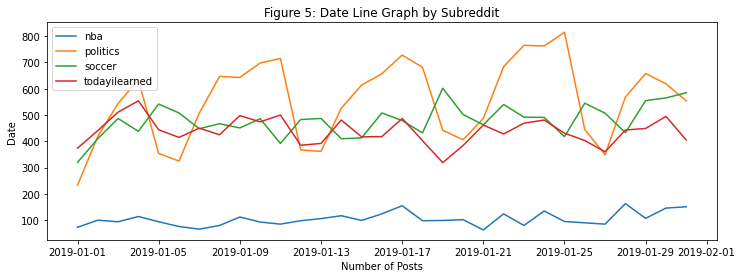

In [34]:
plt.figure(figsize=(12,4))

plt.title("Figure 5: Date Line Graph by Subreddit")
plt.xlabel("Number of Posts")
plt.ylabel("Date")
plt.xticks(rotation=0)

legend=[]
for i in Plot.index:
    x = dataTime[dataTime['subreddit']==i].groupby('date').count().index
    y = dataTime[dataTime['subreddit']==i].groupby('date').count().hour
    legend.append(i)
    plt.plot(x, y)

plt.legend(legend)

As is shown in Figure 5, there is an observeable similar pattern on the 'politics', 'todayilearned' and 'nba' trends. They somewhat go up and down in sync, as opposed to 'soccer' where for some time periods an opposite trend is observed. The peak dates of 'polictics', 'todayilearned', and 'nba' are somewhere around Jan 4, Jan 9, Jan 17, Jan 24, and Jan 30. These dates are usually weekends. 
Compared to the other three subreddit, 'politics' is the most unstabble as abrupt changes in the trend are observed. 

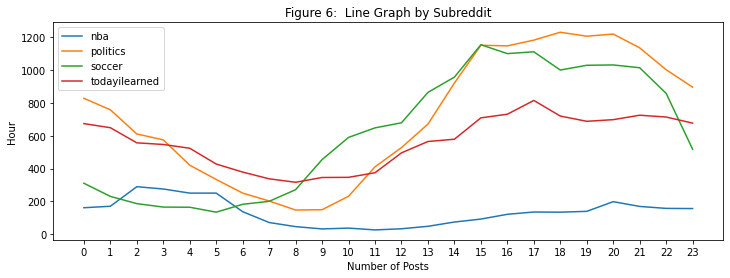

In [35]:
plt.figure(figsize=(12,4))

plt.title("Figure 6:  Line Graph by Subreddit")
plt.xlabel("Number of Posts")
plt.ylabel("Hour")
plt.xticks([i for i in range(24)], rotation=0)

legend=[]
for i in Plot.index:
    x = dataTime[dataTime['subreddit']==i].groupby('hour').count().index
    y = dataTime[dataTime['subreddit']==i].groupby('hour').count().date
    legend.append(i)
    plt.plot(x, y)

plt.legend(legend)

As is shown in Figure 6, there is an observeable similar pattern on all of the subreddits except that it seems like 'nba' authors are more active from 2am to 5am than authors of other subreddits. The peak posting time is from 15pm to 21pm. The minimum posting time is around 7am.

### (E) Column: title
I used counter to analyze the top 30 most frequent words for each subreddit. There seems to be few overlapps between the subreddits. The words are mostly representative of the subreddit. I removed any non alphanumeric characters because they are not informative when taken out individually witout knowing the context.

In [0]:
from nltk.corpus import stopwords
import re
stop= set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

def transform(df, k=50):

    counterDic = {}
    for sub in Plot.index:
       title = df[df['subreddit']==sub].title.values
       counter = Counter()
       for t in title:
           counter.update([normalise(word) for word in re.findall(r'\w+', t)
                           if word.lower() not in stop])
       counterDic[sub] = counter.most_common(k)
    return counterDic 

counterDic = transform(data,k=30)

In [37]:
counterDic['soccer']

[('1', 2095),
 ('0', 1484),
 ('2', 1308),
 ('v', 1176),
 ('sign', 1141),
 ('match', 1058),
 ('leagu', 1034),
 ('player', 969),
 ('goal', 894),
 ('cup', 804),
 ('citi', 794),
 ('club', 774),
 ('chelsea', 761),
 ('footbal', 750),
 ('loan', 692),
 ('unit', 688),
 ('thread', 674),
 ('season', 654),
 ('3', 643),
 ('year', 635),
 ('team', 598),
 ('game', 566),
 ('barcelona', 545),
 ('real', 543),
 ('de', 523),
 ('manchest', 516),
 ('madrid', 514),
 ('play', 486),
 ('premier', 478),
 ('liverpool', 470)]

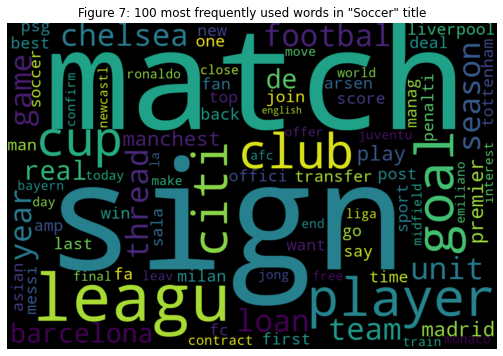

In [38]:
#word cloud for soccer
string = ' '.join(w[0] for w in transform(data,k=100)['soccer'])
titleWordcloud = WordCloud(width = 1200, height = 800).generate(string)

plt.figure(figsize=(10,6))
plt.imshow(titleWordcloud, interpolation='bilinear')
plt.title('Figure 7: 100 most frequently used words in "Soccer" title')
plt.axis("off")
plt.show()

In [39]:
counterDic['todayilearned']

[('til', 11830),
 ('year', 1178),
 ('use', 1158),
 ('one', 875),
 ('name', 796),
 ('peopl', 766),
 ('first', 713),
 ('call', 706),
 ('u', 674),
 ('time', 667),
 ('world', 592),
 ('day', 573),
 ('make', 530),
 ('would', 513),
 ('state', 464),
 ('1', 464),
 ('like', 462),
 ('000', 428),
 ('actual', 420),
 ('made', 417),
 ('american', 408),
 ('new', 404),
 ('man', 400),
 ('kill', 394),
 ('woman', 383),
 ('two', 378),
 ('million', 375),
 ('war', 371),
 ('2', 358),
 ('die', 357)]

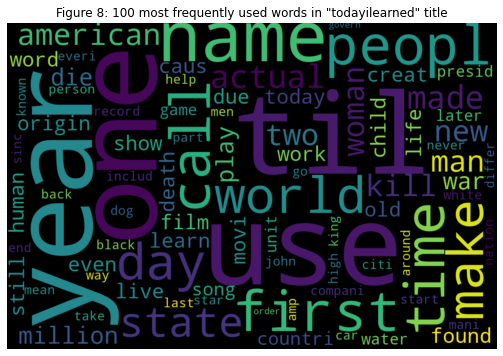

In [40]:
#word cloud for todayilearned
string = ' '.join(w[0] for w in transform(data,k=100)['todayilearned'])
titleWordcloud = WordCloud(width = 1200, height = 800).generate(string)

plt.figure(figsize=(10,6))
plt.imshow(titleWordcloud, interpolation='bilinear')
plt.title('Figure 8: 100 most frequently used words in "todayilearned" title')
plt.axis("off")
plt.show()

In [41]:
counterDic['nba']

[('game', 526),
 ('nba', 364),
 ('player', 331),
 ('team', 290),
 ('point', 264),
 ('harden', 253),
 ('season', 218),
 ('trade', 215),
 ('3', 213),
 ('would', 185),
 ('jame', 183),
 ('get', 181),
 ('laker', 160),
 ('lebron', 159),
 ('5', 158),
 ('play', 149),
 ('v', 145),
 ('1', 142),
 ('star', 142),
 ('year', 140),
 ('2', 135),
 ('time', 123),
 ('win', 121),
 ('10', 121),
 ('thread', 116),
 ('2019', 116),
 ('like', 114),
 ('warrior', 113),
 ('best', 112),
 ('go', 112)]

In [42]:
counterDic['politics']

[('trump', 7187),
 ('shutdown', 2225),
 ('say', 1676),
 ('wall', 1340),
 ('democrat', 1251),
 ('u', 1155),
 ('border', 1140),
 ('hous', 1054),
 ('presid', 981),
 ('govern', 953),
 ('new', 733),
 ('pelosi', 715),
 ('white', 658),
 ('ocasio', 639),
 ('2020', 637),
 ('cortez', 637),
 ('state', 614),
 ('mueller', 597),
 ('donald', 587),
 ('senat', 551),
 ('report', 541),
 ('call', 518),
 ('american', 495),
 ('gop', 461),
 ('russia', 455),
 ('republican', 442),
 ('end', 438),
 ('worker', 433),
 ('bill', 425),
 ('feder', 415)]

In [0]:
def sharedWords(counterDic1, counterDic2):
    v = []
    for w in dict(counterDic1).keys(): 
        if w in dict(counterDic2).keys():
            v.append(w)

    return list(set(v))

In [142]:
print('The number of shared words between each label are as follows.')
print('"soccer" and "politics": %d' % (len(sharedWords(counterDic['soccer'], counterDic['politics']))))
print('"soccer" and "todayilearned": %d' % (len(sharedWords(counterDic['soccer'], counterDic['todayilearned']))))
print('"soccer" and "nba": %d' % (len(sharedWords(counterDic['soccer'], counterDic['nba']))))
print('"politics" and "nba": %d' % (len(sharedWords(counterDic['politics'], counterDic['nba']))))
print('"politics" and "todayilearned": %d' % (len(sharedWords(counterDic['politics'], counterDic['todayilearned']))))
print('"todayilearned" and "nba": %d' % (len(sharedWords(counterDic['todayilearned'], counterDic['nba']))))

The number of shared words between each label are as follows.
"soccer" and "politics": 0
"soccer" and "todayilearned": 3
"soccer" and "nba": 11
"politics" and "nba": 0
"politics" and "todayilearned": 5
"todayilearned" and "nba": 6


###(F) num_comments
1. The field 'num_comments' does not have null value.
2. The sum of all comments for each subreddit is generally porportional to the number of posts that each subreddit has: 'politics' still ranks the first in terms of the number of comments; 'soccer' comes second and is very close to 'todayilearned', which ranks the thrid, with 'nba' being the fewest.
3. People who follow 'politics' are the most active commenters and this is backed up by all the statistics like mean, medium, etc. For every post there are at least 6 comments, as opposed to 'soccer' and 'todayilearned', whose fewest comments are 0, and 'nba' that receives at least 1 comment. 'politics' number of comments is the most dispersed. Although its medium comments are 26, there are a lot of posts that become frenetic.
4. The dispersion of 'nba' and 'todayilearned' is similar. Howerver, people who follow 'nba' are more active commenters even though its number of posts is the least. 
5. The number of comments of 'todayilearned' is the most polarised given that its medium comments is still 1 but its mean number of comments is not low. A lot of posts do not get comments but at the same time there are a few hot posts.
6. 'soccer'has the post that has the second most comments.

In [43]:
data[data['num_comments'].isna()]

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url


In [44]:
data.groupby('subreddit').num_comments.sum()

subreddit
nba              191484 
politics         2136184
soccer           641484 
todayilearned    510370 
Name: num_comments, dtype: int64

In [45]:
data.groupby('subreddit').num_comments.describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
nba,3224.0,59.393300,226.479292,1.0,6.0,19.0,44.0,5467.0
politics,17210.0,124.124579,561.324585,6.0,13.0,26.0,61.0,30192.0
soccer,14859.0,43.171411,167.601451,0.0,1.0,6.0,27.0,9737.0
todayilearned,13598.0,37.532725,212.425234,0.0,0.0,1.0,9.0,4996.0


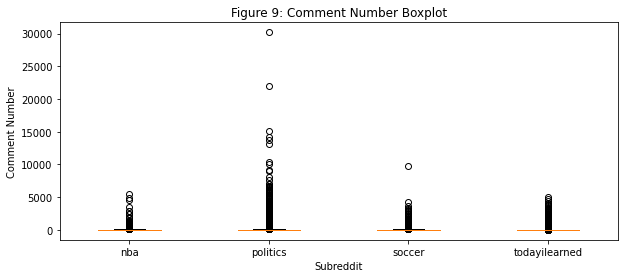

In [46]:
# plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(10,4))
DATA=[]
for sub in Plot.index:
   DATA.append(data[data['subreddit']==sub].num_comments)

plt.boxplot(DATA)
plt.title("Figure 9: Comment Number Boxplot")
plt.xlabel("Subreddit")
plt.ylabel("Comment Number")
ax.set_xticklabels(['nba', 'politics', 'soccer', 'todayilearned'])
plt.xticks(rotation=0)
plt.show()

###(G) Column: score
As is shown in the table and figure:

1. 'todayilearned' has a lot of posts that received the most amount of likes but most of posts' score is low.
2. 'politics' has the most number of posts that received a good score, given that its mean and medium's value is the greatest amoung the subreddits.

In [47]:
data.groupby('subreddit').score.describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
nba,3224.0,217.025434,1233.745800,0.0,1.0,5.0,37.0,28067.0
politics,17210.0,1311.564788,4986.665842,0.0,0.0,65.0,420.0,87607.0
soccer,14859.0,171.471970,869.472643,0.0,1.0,8.0,45.0,39410.0
todayilearned,13598.0,948.155096,6559.944466,0.0,1.0,2.0,37.0,125751.0


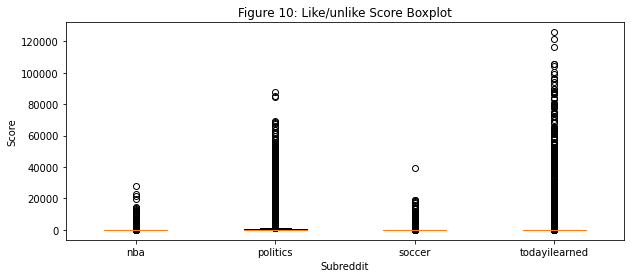

In [48]:
# plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(10,4))
DATA=[]
for sub in Plot.index:
   DATA.append(data[data['subreddit']==sub].score)

plt.boxplot(DATA)
plt.title("Figure 10: Like/unlike Score Boxplot")
plt.xlabel("Subreddit")
plt.ylabel("Score")
ax.set_xticklabels(['nba', 'politics', 'soccer', 'todayilearned'])
plt.xticks(rotation=0)
plt.show()

## Part 3: Classification
###(A) Data Processing
reason for onehot encode date but label encode time

1. Because the original number of features reached a limit where the feature selection functions were not able to run, I decided to boostrap 6000 data points to train by spliting them into the training set and test set. Bootstrap can also ensure the representativeness of the sample and make a good prediction on the result of all data points.
2. Before I bootstrapped the data, I reshuffle the dataframe to make sure all data with different labels are scattered throughout the table. I extracted the last 1000 datapoints for final model validation.
3. I removed data points with '[deleted]' authors. As was previously pointed out, '[deleted]' has a great number of datapoints. Its impact as an outlier and null value would be huge on the model. I removed data points with the author that posted less than 2 times because as previously mentioned, value 2 is at the 75% percentil. 
4. As I obeserved no distinct trends for the date feature (no overall ups or downs) but there are specific dates that reached the peak, I decided to one hot encode date as opposed to label encoding to view different dates as individual features. 
5. id was deleted becuase no pattern was observed.
6. Text in title was normalised. As previously analysed, the top 30 most frequent words for each label were added as features, the value of which is filled with tfidf.

In [0]:
Data=data.copy()
#shuffle dataframe
#citation: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df = Data.sample(frac=1, random_state=42).reset_index(drop=True)
#bootstrap 6000 datapoints for training and testing
Data = df[:40000].sample(n=10000, random_state=42, replace=True)
Data1 = Data.reset_index(drop=True)

#extract 1000 for validation(testing)
dataV = df[-1000:]

In [0]:
def oneHot(df):
    l = ['author','date']
    for cl in l:
        one_hot = pd.get_dummies(df[cl])
        df = df.drop(cl,axis=1)
        df = df.join(one_hot, lsuffix='_caller', rsuffix='_other')
    return df

def transformTitle(text):
    l = [normalise(word) for word in re.findall(r'\w+', text)
                           if word.lower() not in stop]
    l = ' '.join(str(x) for x in l)
    return l

def vocab(counterDic):
    v = []
    for sub in Plot.index:
        for w in dict(counterDic[sub]).keys():
            v.append(w)

    return list(set(v))

def replace(df):
    l = {'nba': 0, 'todayilearned': 1, 'soccer': 2, 'politics': 3}
    df['subReddit'] = df['subReddit'].replace(l)
    return df


def dataProcessor(Data, authorPost=2, vectorizer='tfidf', topk=30):
    counterDic = transform(Data, k=topk)
    Data = Data[Data['author']!='[deleted]']
    au = Data['author'].value_counts()>=authorPost
    au = pd.DataFrame(au)
    au = [i for (i, a) in au.itertuples(index=True) if a]
    Data = Data[Data['author'].isin(au)]

    Data['date'] = Data['created_utc'].apply(lambda x: datetime.date(x))
    Data['hour'] = Data['created_utc'].apply(lambda x: datetime.time(x).hour)
    Data = Data.drop(['created_utc','id','selftext','url'], axis=1)
    Data = Data.reset_index(drop=True)


    Data = oneHot(Data)
    Data = Data.rename(columns={'subreddit': 'subReddit', 'title': 'Title'})
    Data['Title'] = Data['Title'].apply(lambda x: transformTitle(x))

    #tfidf title
    if vectorizer=='tfidf':    
        vocabulary = vocab(counterDic)
        vectorizer = TfidfVectorizer(vocabulary=vocabulary, use_idf=True, smooth_idf=True, norm=None)
        arrayTFIDF = vectorizer.fit_transform(Data['Title']).toarray()
        Data = pd.concat([Data,pd.DataFrame(arrayTFIDF,columns=vocabulary)],axis=1)
        Data = Data.drop('Title', axis=1)
    elif vectorizer=='tf':
        vocabulary = vocab(counterDic)
        vectorizer = CountVectorizer(vocabulary=vocabulary)
        arrayTF = vectorizer.fit_transform(Data['Title']).toarray()
        Data = pd.concat([Data,pd.DataFrame(arrayTF,columns=vocabulary)],axis=1)
        Data = Data.drop('Title', axis=1)

    #label
    Data = replace(Data)
    
    return Data

In [51]:
Data = dataProcessor(Data1)
Data.shape

(4732, 1352)

###(B) Feature Preparation


In [0]:
X = Data.drop(['subReddit'], axis=1)
y = Data['subReddit'].copy()

In [0]:
# model = LogisticRegression(max_iter=10000) #runtime limit
# rfe = RFE(model, n_features_to_select=800)
# x_selected = rfe.fit_transform(X, y)
# x_selected.shape

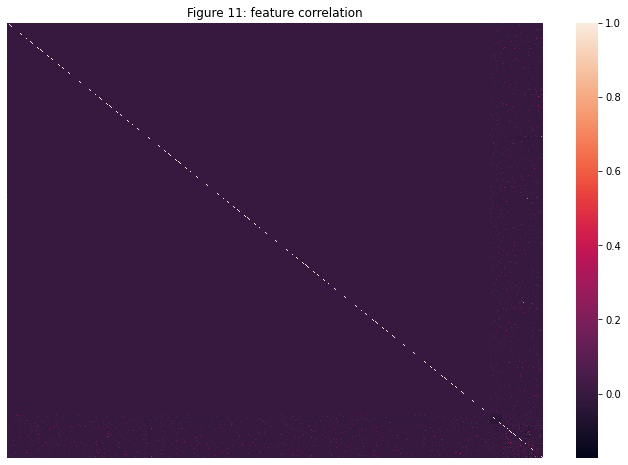

In [54]:
# X = x_selected
corr = X.corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, yticklabels=False, xticklabels=False,
           ax = ax)

ax.set_title('Figure 11: feature correlation')# after feature selection')
plt.show()


* As is shown in Figure 9, the features after feature selection are not correlated. 

###(C) Model implentation

####Logistic Regression. 
Logistic Regression was chosen because it is suitable for multiclass classification tasks. Ridge regression is used in the logistic regression model. C can be tuned to reach its maximum performance.


***Split the Data***

The data was split into a training and test set, with a 70%-30% split. This is the same for all the models to be implemented.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

**Feature Scaling**

Feature scaling is used to normalize the range of independent variables or features of data. Different features in the data might have varying magnitude. The range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. This is especially important for the logistic regression model.

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# train a logistic regression classifier
clf = LogisticRegression(C=1.0, max_iter=10000).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 1.0
Test accuracy: 0.9781690140845071


#### Naive Bayes
Naive Bayes is a probabilitic classifier for multiclass classification. It is used to find the best class by using probablity to find the maximum a posteriori class. Naive Bayes assumes features are conditionally independent of one another. 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

clf = MultinomialNB().fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
        
# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.5474033816425121
Test accuracy: 0.5450704225352113


####XGboost
XGboost is also for classification tasks. It is essentially a gradient boosting trees algorithm that is based on weak learners (high bias, low variance). 
* The objective ('multi:softprob') sets XGboost to do multiclass classification tasks.  The result contains predicted probability of each data point belonging to each class. 
* 'eta': Step size shrinkage used in update to prevents overfitting. range: [0,1]
* 'max_depth': Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. range: [0,∞]

Citation: https://xgboost.readthedocs.io/en/latest/tutorials/model.html

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train = xgb.DMatrix(X_train, label=y_train)
X_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, #learning rate
    'max_depth': 6,  
    'objective': 'multi:softprob',  
    'num_class': 4} 
steps = 20

XGB = xgb.train(param, X_train, steps)

y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)

best_train_pred =  np.asarray([np.argmax(line) for line in y_train_pred])
best_test_pred =  np.asarray([np.argmax(line) for line in y_test_pred])

train_accuracy = accuracy_score(y_train, best_train_pred)
test_accuracy = accuracy_score(y_test, best_test_pred)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9299516908212561
Test accuracy: 0.9176056338028169


###(D) Feature Tuning

####Feature Number

* Initially I tried to use RFE to do recursive feature selection to tune the feature number for Naive Bayes. Feature reduces overfitting and improves the accuracy of the classifier by recursively judging the weights of features. This is especially important for Naive Bayes because of the conditionally independent assumption. This failed because of computation limit. 
* Instead, I shuffled the columns of X to ensure certain fields do not get removed completely and changed the feature number.


In [0]:
def feature_num(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    x = pd.DataFrame(X).sample(frac=1, axis=1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1]) #X.shape[1] --> 1000
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]
        
        clf = MultinomialNB().fit(X_train_subset, y_train)

        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        
        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        p=subset_size
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    
    return result_df

Text(0, 0.5, 'Accuray')

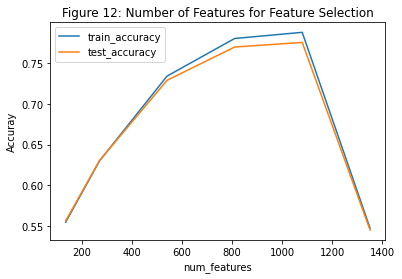

In [61]:
feature_num_df = feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])
plt.title("Figure 12: Number of Features for Feature Selection")
plt.ylabel("Accuray")


As is shown in Figure 12, the model performed the best at 0.8 of the number of features and the second best at 0.6. The training set at 0.8 overfitts to the model compared to 0.6.

In [62]:
feature_num_df

,num_features,train_accuracy,test_accuracy
0,135,0.554650,0.556338
1,270,0.629831,0.630282
2,540,0.733998,0.728873
3,810,0.780193,0.769718
4,1080,0.787742,0.775352
5,1351,0.547403,0.545070


####TFIDF/TF

TF and TFIDF achieved the same value in the test accuracy. Usually TFIDF does better than TF, especially for text analysis because TFIDF also takes the rareness of the word across the document into account. The same score might result from the fact that text features that are generated from the 'title' field are not enough. This is can further explored by changing the size of top k most frequest words in 'title'.

**Term Frequency**

In [63]:
DataTF = dataProcessor(Data1, authorPost=2, vectorizer='tf')

XTF = DataTF.drop(['subReddit'], axis=1)
yTF = DataTF['subReddit'].copy()

# model = LogisticRegression(max_iter=10000) #runtime limit
# rfe = RFE(model, n_features_to_select=500)
# x_selectedTF = rfe.fit_transform(XTF, yTF)

X_trainTF, X_testTF, y_trainTF, y_testTF = train_test_split(XTF, yTF, random_state=42, test_size=0.3)

scaler = StandardScaler()
X_trainTF = scaler.fit_transform(X_trainTF)
X_testTF = scaler.transform(X_testTF)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0, max_iter=10000).fit(X_trainTF, y_trainTF)

# predict on train and test set
y_train_predictTF = clf.predict(X_trainTF)
y_test_predictTF = clf.predict(X_testTF)

# calculate train and test accuracy
train_accuracyTF = accuracy_score(y_trainTF, y_train_predictTF)
test_accuracyTF = accuracy_score(y_testTF, y_test_predictTF)

# report results
print("Train accuracy: {}".format(train_accuracyTF))
print("Test accuracy: {}".format(test_accuracyTF))

Train accuracy: 1.0
Test accuracy: 0.9781690140845071


**TFIDF**

In [64]:
DataTFIDF = dataProcessor(Data1, authorPost=2, vectorizer='tfidf')

XTFIDF = DataTFIDF.drop(['subReddit'], axis=1)
yTFIDF = DataTFIDF['subReddit'].copy()

# model = LogisticRegression(max_iter=10000) #runtime limit
# rfe = RFE(model, n_features_to_select=500)
# x_selectedTF = rfe.fit_transform(XTF, yTF)

X_trainTFIDF, X_testTFIDF, y_trainTFIDF, y_testTFIDF = train_test_split(XTFIDF, yTFIDF, random_state=42, test_size=0.3)

scaler = StandardScaler()
X_trainTFIDF = scaler.fit_transform(X_trainTFIDF)
X_testTFIDF = scaler.transform(X_testTFIDF)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0, max_iter=10000).fit(X_trainTFIDF, y_trainTFIDF)

# predict on train and test set
y_train_predictTFIDF = clf.predict(X_trainTFIDF)
y_test_predictTFIDF = clf.predict(X_testTFIDF)

# calculate train and test accuracy
train_accuracyTFIDF = accuracy_score(y_trainTFIDF, y_train_predictTFIDF)
test_accuracyTFIDF = accuracy_score(y_testTFIDF, y_test_predictTFIDF)

# report results
print("Train accuracy: {}".format(train_accuracyTFIDF))
print("Test accuracy: {}".format(test_accuracyTFIDF))

Train accuracy: 1.0
Test accuracy: 0.9781690140845071


####Number of Most Frequent Words


As is shown in Figure 13, the model achieved its best performance with 30 most frequent words occuring in a title for each label.

In [0]:
def frequentWords(Data):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features

    result_list = []
    for k in [10, 20, 30, 40, 50]:
        D = dataProcessor(Data, authorPost=2, topk=k)
        XTransform = D.drop(['subReddit'], axis=1)
        y = D['subReddit'].copy()

        # model = LogisticRegression(max_iter=5000) #runtime limit
        # rfe = RFE(model, n_features_to_select=n)
        # XTransform = rfe.fit_transform(X, y)
    
        X_train, X_test, y_train, y_test = train_test_split(XTransform, y, test_size=0.3, random_state=42)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        clf = LogisticRegression(C=1.0, max_iter=10000).fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)  
 
        # add to result_list
        result_list.append((k, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_most_frequent_words", "train_accuracy", "test_accuracy"])
    
    
    return result_df

Text(0, 0.5, 'Accuray')

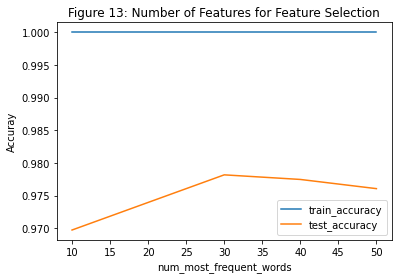

In [66]:
topkdf = frequentWords(Data1)
topkdf.plot(x="num_most_frequent_words", y=["train_accuracy", "test_accuracy"])
plt.title("Figure 13: Number of Features for Feature Selection")
plt.ylabel("Accuray")

###(E) Cross Validation

In [0]:
def random_mean_ci(X, y, cl, num_tests=10):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []

    for i in range(num_tests): 
        random_state_num = random.randint(1,1000)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_num)

        if cl=='LR':
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)  
            model = LogisticRegression(C=1.0, max_iter=10000).fit(X_train, y_train)

        elif cl=='NB':
            model = MultinomialNB().fit(X_train, y_train)

        elif cl=='XGB':
            X_train = xgb.DMatrix(X_train, label=y_train)
            X_test = xgb.DMatrix(X_test, label=y_test)
            model = xgb.train(param, X_train, steps)
            
        

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        if cl=='XGB':
            y_train_pred =  np.asarray([np.argmax(line) for line in y_train_pred])
            y_test_pred =  np.asarray([np.argmax(line) for line in y_test_pred])

        train_results.append(accuracy_score(y_train, y_train_pred))
        test_results.append(accuracy_score(y_test, y_test_pred))
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    print("Train mean accuracy over 10 random splits: {}".format(train_mean))
    print("Train confidence interval over 10 random splits: [{}, {}]".format(train_ci_low, train_ci_high))
    print("Test mean accuracy over 10 random splits: {}".format(test_mean))
    print("Test confidence interval over 10 random splits: [{}, {}]".format(test_ci_low, test_ci_high))

    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

**Logistic Regression**

In [68]:
train_meanL, train_ci_lowL, train_ci_highL, test_meanL, test_ci_lowL, test_ci_highL = random_mean_ci(X, y, cl='LR', num_tests=10)

Train mean accuracy over 10 random splits: 1.0
Train confidence interval over 10 random splits: [nan, nan]
Test mean accuracy over 10 random splits: 0.9721830985915494
Test confidence interval over 10 random splits: [0.96937068228186, 0.9749955149012388]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning:

invalid value encountered in multiply



***Naive Bayes***

In [69]:
train_meanNB, train_ci_lowNB, train_ci_highNB, test_meanNB, test_ci_lowNB, test_ci_highNB = random_mean_ci(X, y, 'NB', num_tests=10)

Train mean accuracy over 10 random splits: 0.5573369565217391
Train confidence interval over 10 random splits: [0.550342952659727, 0.5643309603837512]
Test mean accuracy over 10 random splits: 0.5505633802816902
Test confidence interval over 10 random splits: [0.5368720510293533, 0.564254709534027]


***XGboost***

In [70]:
train_meanXGB, train_ci_lowXGB, train_ci_highXGB, test_meanXGB, test_ci_lowXGB, test_ci_highXGB = random_mean_ci(X, y, 'XGB', num_tests=10)

Train mean accuracy over 10 random splits: 0.9310084541062802
Train confidence interval over 10 random splits: [0.9286157221416181, 0.9334011860709422]
Test mean accuracy over 10 random splits: 0.9020422535211268
Test confidence interval over 10 random splits: [0.8961031010969441, 0.9079814059453094]


Text(0, 0.5, 'Accuray')

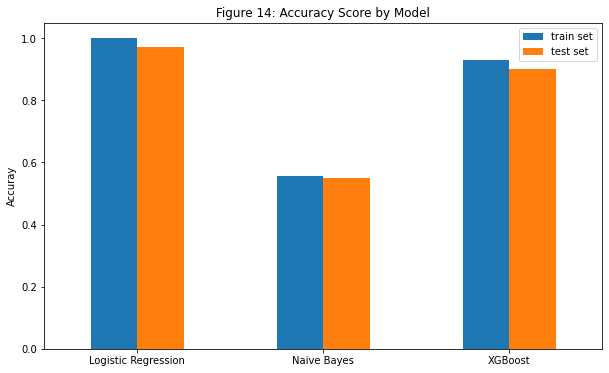

In [71]:
a = pd.DataFrame([train_meanL, train_meanNB, train_meanXGB])
b = pd.DataFrame([test_meanL, test_meanNB, test_meanXGB])
c = pd.concat([a,b],axis=1)
modelList = ['Logistic Regression','Naive Bayes','XGBoost']
c.columns = ['train set','test set']
c.index=modelList


c.plot(kind='bar', y=c.columns, figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Figure 14: Accuracy Score by Model")
plt.ylabel("Accuray")


Figure 14 shows the baseline performance of each model before hyperparameter tuning. The logistic regression model did the best, reaching an average accuracy score of 0.972 on the test set. XGBoost comes the second with an average accuracy of 0.902. Naive Bayes comes the third with an average accuracy of 0.554. 

###(F) Hyperparameter Tuning

###Logistic Regression

In [0]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)  

        clf = LogisticRegression(C=param).fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    
    return result_df

Text(0, 0.5, 'Accuray')

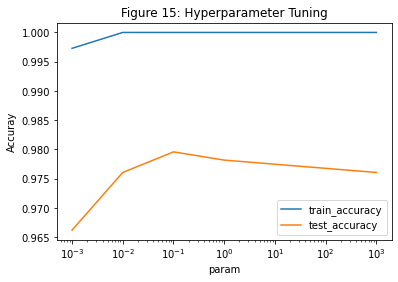

In [73]:
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)
plt.title("Figure 15: Hyperparameter Tuning")
plt.ylabel("Accuray")

The train accuracy increases from .001 to .01 and reaches a plateau. The test accuracy increases significantly from 0.001 to 0.01, and steadily from 0.01 to 0.1. It starts to drop from 0.1 and dwindles after 1. The best c is 0.1.

###Naive Bayes 
The smoothing priors  accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting  is called Laplace smoothing, while  is called Lidstone smoothing.
Citation: https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes

In [0]:
def hyperparameterNB(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    x = pd.DataFrame(X).sample(frac=1, axis=1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
    
    for a in [0.00001, 0.2, 0.4, 0.6, 0.8, 1.0]:

        subset_size = int(0.8*X.shape[1]) #X.shape[1] --> 1000
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]
        
        clf = MultinomialNB(alpha=a).fit(X_train_subset, y_train)

        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        
        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        p=subset_size
        # add to result_list
        result_list.append((a, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["alpha", "train_accuracy", "test_accuracy"])
    
    
    return result_df

Text(0, 0.5, 'Accuray')

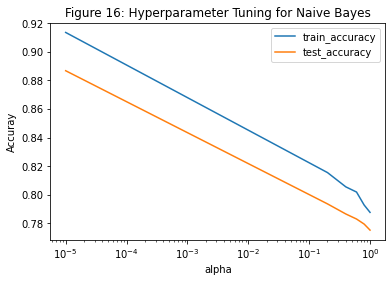

In [75]:
param_dfNB = hyperparameterNB(X, y)
param_dfNB.plot(x="alpha", y=["train_accuracy", "test_accuracy"], logx=True)
plt.title("Figure 16: Hyperparameter Tuning for Naive Bayes")
plt.ylabel("Accuray")

The model performed the best at an alpha value close to 0 on both the training set and test set.

###XGBoost 

In [0]:
def hyperparameterXGB(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    
    result_list = []
    # x = pd.DataFrame(X).sample(frac=1, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
    
    for e in [0,0.2,0.4,0.6,0.8,1]:
        for m in [3, 4, 5, 6, 7, 8]:
            
            param = {'eta': e, 'max_depth': m, 'objective': 'multi:softprob', 'num_class': 4} 
            
            X_trainT = xgb.DMatrix(X_train, label=y_train)
            X_testT = xgb.DMatrix(X_test, label=y_test)
            clf = xgb.train(param, X_trainT, steps)

            y_train_predict = clf.predict(X_trainT)
            y_test_predict = clf.predict(X_testT)

            y_train_predict =  np.asarray([np.argmax(line) for line in y_train_predict])
            y_test_predict =  np.asarray([np.argmax(line) for line in y_test_predict])
        
            # calculate train and test accuracy
            train_accuracy = accuracy_score(y_train, y_train_predict)
            test_accuracy = accuracy_score(y_test, y_test_predict)

            p=(e,m)
            # add to result_list
            result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["Param", "train_accuracy", "test_accuracy"])
    
    
    return result_df

Text(0, 0.5, 'Accuray')

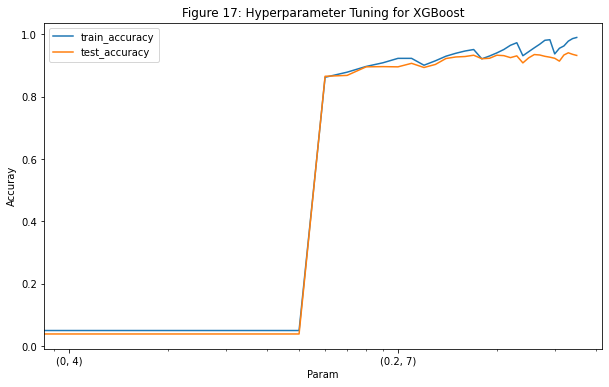

In [77]:
param_dfXGB = hyperparameterXGB(X, y)
param_dfXGB.plot(x='Param',y=["train_accuracy", "test_accuracy"], logx=True, figsize=(10,6))
plt.title("Figure 17: Hyperparameter Tuning for XGBoost")
plt.ylabel("Accuray")

The accuray score is heavily influenced by eta in the beginning, with the value of the accuracy score on both the training set and test set being low. When eta reaches 0.2, the accuracy score begins to soar to above 0.86. The model tends to overfit as the two hyperparameters reaches its maximum value. The best hyperparameter is (1, 6) in this case.

In [90]:
param_dfXGB[param_dfXGB.test_accuracy==param_dfXGB.test_accuracy.max()]

,Param,train_accuracy,test_accuracy
33,"(1, 6)",0.978261,0.940845


##(G) Model Evaluation
I took the test set that was split at the beginning of the Data Processing section for validating the final models that were tuned. The entire training set (training + test set) was used to for validation. 

The hyperparamters used for the models and the result change compared to the baseline are as follows.  
#####**Logistic Regression: C = 0.1**

The accuracy score improved from 0.9782 to 0.9784. In the first round of iteration, the C value that was used was set to default (0.1). The value also achieved the best performance on hyperparameter tuning. 

#####**Naive Bayes: Feature number = 0.8 of the orginial feature number, alpha=0.00001.**

There is a huge increase in accuray, from 0.5451 to 0.8486. 

####**XGBoost: eta=1, max_depth=6**

The accuracy score improved from 0.9176 to 0.9459. 


In [0]:
#Format the test Set to match the training set
def testSetFormat(dataV, X):
    TestDF = dataProcessor(dataV)
    X_test = TestDF.drop(['subReddit'], axis=1)
    y_test = TestDF['subReddit'].copy()
    cList=[]
    cList1=[]
    for cl in X.columns: 
        if cl not in X_test.columns:
            cList.append(cl)
    for cl in X_test.columns:
        if cl not in X.columns:
            cList1.append(cl)

    d = pd.DataFrame(0, index=np.arange(len(X_test)), columns=cList)
    X_test = pd.concat([X_test, d],axis=1)
    X_test = X_test.drop(cList1,axis=1)

    col = X.columns
    X_test = X_test[col]
    return X_test

X_test = testSetFormat(dataV, X)

#Final model 

#Logistic Regression
scaler = StandardScaler()
X_trainSc = scaler.fit_transform(X)
X_testSc = scaler.transform(X_test)

LR = LogisticRegression(C=1.0, max_iter=10000).fit(X_trainSc,y)

y_train_predL = LR.predict(X_trainSc)
y_test_predL = LR.predict(X_testSc)

#Naive Bayes
X_shuffle = pd.DataFrame(X).sample(frac=1,axis=1,random_state=42)
subset_size = int(0.8*X_shuffle.shape[1]) #X.shape[1] --> 1000
X_80 = X_shuffle.iloc[:, 0:subset_size]

X_sp = testSetFormat(dataV, X_80)
NB = MultinomialNB(alpha=0.00001).fit(X_80, y)
y_train_predNB = NB.predict(X_80)
y_test_predNB = NB.predict(X_sp)

#XGBoost
param = {'eta': 1, 'max_depth': 6, 'objective': 'multi:softprob', 'num_class': 4} 
X_trainT = xgb.DMatrix(X, label=y)
X_testT = xgb.DMatrix(X_test, label=y_test)

XGB = xgb.train(param, X_trainT, steps)

y_train_predXGB = XGB.predict(X_trainT)
y_test_predXGB = XGB.predict(X_testT)

y_train_predXGB =  np.asarray([np.argmax(line) for line in y_train_predXGB])
y_test_predXGB =  np.asarray([np.argmax(line) for line in y_test_predXGB])


# calculate train and test accuracy
train_accuracyL = accuracy_score(y, y_train_predL)
test_accuracyL = accuracy_score(y_test, y_test_predL)
cmL = confusion_matrix(y_test, y_test_predL)

train_accuracyNB = accuracy_score(y, y_train_predNB)
test_accuracyNB = accuracy_score(y_test, y_test_predNB)
cmNB = confusion_matrix(y_test, y_test_predNB)

train_accuracyXGB = accuracy_score(y, y_train_predXGB)
test_accuracyXGB = accuracy_score(y_test, y_test_predXGB)
cmXGB = confusion_matrix(y_test, y_test_predXGB)

In [98]:
print("Logistic Regression Train accuracy: {}".format(train_accuracyL))
print("Logistic Regression Test accuracy: {}".format(test_accuracyL))
print("Naive Bayes Train accuracy: {}".format(train_accuracyNB))
print("Naive Bayes Test accuracy: {}".format(test_accuracyNB))
print("XGBoost Train accuracy: {}".format(train_accuracyXGB))
print("XGBoost Test accuracy: {}".format(test_accuracyXGB))

Logistic Regression Train accuracy: 1.0
Logistic Regression Test accuracy: 0.9783783783783784
Naive Bayes Train accuracy: 0.9167371090448013
Naive Bayes Test accuracy: 0.8486486486486486
XGBoost Train accuracy: 0.9702028740490279
XGBoost Test accuracy: 0.9459459459459459


Text(0, 0.5, 'Accuray')

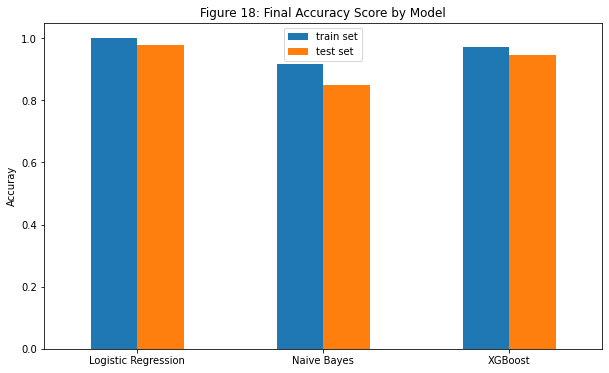

In [99]:
a = pd.DataFrame([train_accuracyL, train_accuracyNB, train_accuracyXGB])
b = pd.DataFrame([test_accuracyL, test_accuracyNB, test_accuracyXGB])
c = pd.concat([a,b],axis=1)
modelList = ['Logistic Regression','Naive Bayes','XGBoost']
c.columns = ['train set','test set']
c.index=modelList


c.plot(kind='bar', y=c.columns, figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Figure 18: Final Accuracy Score by Model")
plt.ylabel("Accuray")

Overall, the Logistic Regression model did the best on both the training set and the test set. The three models (Logistic Regression, Naive Bayes, XGBoost) reached an accuracy of 0.9784, 0.8486, 0.9459 respectively. 

All of the models overfit to the training set, especially Naive Bayes. This is possibly because some of the features are post-specific like 'title' or 'author'. The might be informative words in the test set for the 'title' field that failed to be captured in the training set whereas the informative words in the training set are not as important in the test set. This might also be because the data was sampled for the training set. In other words, the sample size might not be big enough to capture all major informative words. 

When doing word count for 'title' to investigate what are the most frequent words for each laebl, there are shared words between labels. Because these words later become part of the features, this posed a problem for classification as it confuses the model about which label it belongs to. This can be further improved by using pointwise mutual information, which is more representative of the label. 

Similar to 'title', 'author' is also post-specific. Increasing the sample size might help. Becuase I elimited the author who posted less than 2 times to eliminate the feature number, chances are that authors in the test set are mostly unproductive authors as 2 is at 75% percentil, the author features might not be that informative. When doing social network analysis, I analyzed the shared authors between the labels. This posed another problem for classification as shared authors may confuses the model about which label it belongs to. 

Naive Bayes is a probablistic model. The shared authors and shared most frequent words violated the conditionally independence assumption. This might be why it did poorly. 

The logistic regression model made 4 false positive predictions for 'politics', which should belong to 'soccer'. Naive Bayes did poorly on 'soccer and confused 'politics' with 'soccer. XGBoost did poorly on classifying 'nba', possibly because the label is imbalanced. There are 3 false negatives for 'nba' out of the 5 data points that are labelled as 'nba' in the test set.


Text(0.5, 1.0, 'Figure 19: Logistic Regression Confusion Matrix')

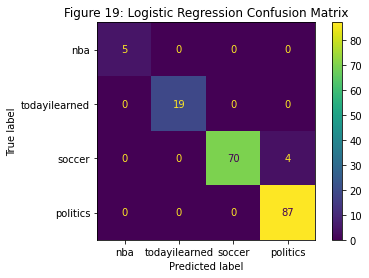

In [94]:
plot_confusion_matrix(estimator=LR, X=X_testSc, y_true=y_test, display_labels=['nba','todayilearned','soccer','politics'])
plt.title("Figure 19: Logistic Regression Confusion Matrix")

Text(0.5, 1.0, 'Figure 20: Naive Bayes Confusion Matrix')

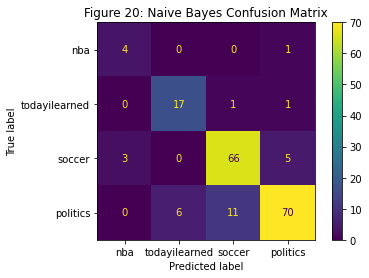

In [101]:
plot_confusion_matrix(estimator=NB, X=X_sp, y_true=y_test, display_labels=['nba','todayilearned','soccer','politics'])
plt.title("Figure 20: Naive Bayes Confusion Matrix")

Text(0.5, 1.0, 'Figure 21: XGBoost Confusion Matrix')

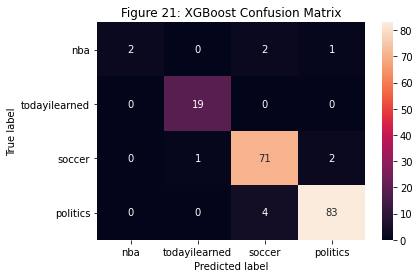

In [128]:
cm = confusion_matrix(y_test, y_test_predXGB)
sns.heatmap(cm, annot=True, xticklabels=['nba','todayilearned','soccer','politics'],
            yticklabels=['nba','todayilearned','soccer','politics'])
plt.xlabel('Predicted label')  
plt.ylabel('True label')  
plt.title("Figure 21: XGBoost Confusion Matrix")

## Part 4: Sentiment Analysis
###a. Use Vader to compute for each post the sentiment of title field.

In [156]:
def evalSentences(sentences, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []

    for sentence in tqdm(sentences):
        ss = sid.polarity_scores(sentence) #PMI(phrase,'excellent')-PMI(phrase,'poor')
        pdlist.append([sentence]+[ss['compound']])
    reviewDf = pd.DataFrame(pdlist)
    reviewDf.columns = columns
    return reviewDf

df = data.copy()
# df['title'] = df['title'].apply(lambda x: transformTitle(x))
titles = df['title'].values
titleDF = evalSentences(titles, columns=['titleCol','vader'])
titleDF = pd.concat([titleDF, data['subreddit']], axis=1, join='inner')

100%|██████████| 48891/48891 [00:10<00:00, 4579.55it/s]


In [167]:
titleDF = titleDF.reset_index(drop=True)
titleDF.head()

,titleCol,vader,subreddit
0,TIL that sci-fi author Phillip K. Dick was once so poor he ate dog food to survive. He would go on to have an outstanding career and write a novel that formed the basis for the movie Blade Runner.,-0.2479,todayilearned
1,"What’s in a name? Trump, allies back away from idea that the border wall needs to be a wall.",0.0000,nba
2,Juninho Pernambucano - The Freekick God,0.2732,soccer
3,"TIL that a 1925 Bugatti 22 Brescia that spent more than 70 years underwater was sold at auction for around $364,700 at the Bonhams auction at Retromobile January 2010. In 1935-36 Swiss authorities wanted their tax money for the car but in the owners attempt to hide it, it fell into a lake.",-0.2617,todayilearned
4,"TIL of Yamei Kim, a Chinese-born American-raised scientist. As a representative of the US Dept of Agriculture, she is responsible for introducing soybeans to America as a protein source for American soldiers.",0.3182,todayilearned


###b. Analyze the distribution of sentiments for each of your 4 subreddit. What can you learn from the results?

(array([ 23.,  50.,  76.,  32., 292.,  75.,  50.,  18.]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 <a list of 8 Patch objects>)

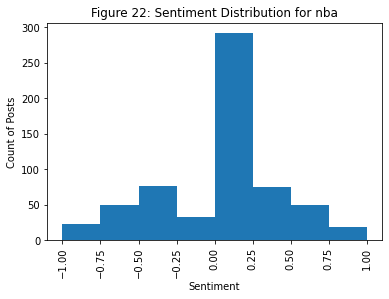

In [179]:
bins_list=[-1,-0.75,-0.5,-0.25,0,0.25,.5,.75,1]
plt.title("Figure 22: Sentiment Distribution for nba")
plt.xlabel("Sentiment")
plt.ylabel("Count of Posts")
plt.xticks(rotation=90)
plt.hist(titleDF[titleDF['subreddit']=='nba'].vader, bins=bins_list)

(array([ 104.,  251.,  360.,  218., 1502.,  391.,  260.,   94.]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 <a list of 8 Patch objects>)

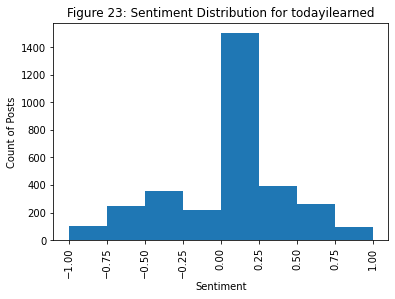

In [180]:
bins_list=[-1,-0.75,-0.5,-0.25,0,0.25,.5,.75,1]
plt.title("Figure 23: Sentiment Distribution for todayilearned")
plt.xlabel("Sentiment")
plt.ylabel("Count of Posts")
plt.xticks(rotation=90)
plt.hist(titleDF[titleDF['subreddit']=='todayilearned'].vader,bins=bins_list)

(array([ 115.,  271.,  369.,  176., 1461.,  384.,  283.,   90.]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 <a list of 8 Patch objects>)

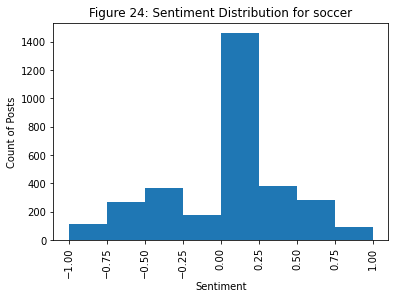

In [181]:
plt.title("Figure 24: Sentiment Distribution for soccer")
plt.xlabel("Sentiment")
plt.ylabel("Count of Posts")
plt.xticks(rotation=90)
plt.hist(titleDF[titleDF['subreddit']=='soccer'].vader, bins=bins_list)

(array([  94.,  278.,  368.,  160., 1411.,  362.,  257.,   72.]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 <a list of 8 Patch objects>)

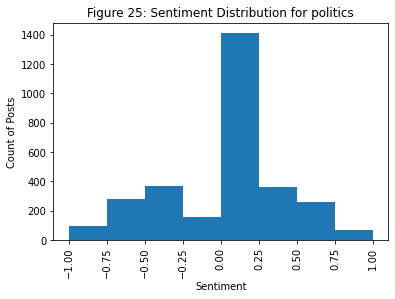

In [182]:
plt.title("Figure 25: Sentiment Distribution for politics")
plt.xlabel("Sentiment")
plt.ylabel("Count of Posts")
plt.xticks(rotation=90)
plt.hist(titleDF[titleDF['subreddit']=='politics'].vader, bins=bins_list)

For all labels, despite a few extremely positive or extremely negative posts, most data points are distributed between 0-0.25. This means most titles are slight more positive than negative for all labels. 





###c. Define a threshold for posts that are clearly positive and clearly negative according to Vader and assign a label for each post accordingly, while removing posts that are not clearly negative or positive.

Based on my distrition, there are just a few that are above 0.75 or below -.75 so these are the thresholds respectively.

In [212]:
titleDf = titleDF[(titleDF.vader <= -0.75) | (titleDF.vader >= 0.75)]
def transformVader(vader):
    if vader <= -0.75:
        x = -1
    elif vader >= 0.75:
        x = 1

    return x

titleDf['groundTruth'] = titleDf['vader'].apply(lambda x: transformVader(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
titleDf.head(1)

,titleCol,vader,subreddit,groundTruth
9,"TIL that in 2014 A Virgin Galactic passenger spaceship exploded during a test flight at the Mojave Air and Space Port, killing one pilot and severely injuring another. The crash was a major setback for Virgin Galactic, a U.S. offshoot of billionaire Richard Branson’s London-based Virgin Group.",-0.8779,politics,-1


###d. For each of the four subreddits, compute the top words that tend to occur in (i) positive titles(ii) negative titles, based on the threshold for positive/negative in (c).

####a. Analyze the results: do you notice any subreddit-specific patterns?
####b. Explain the method/metric you used in your analysis and justify why it was appropriate here.

In [0]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

# Create phrase tree
chunker = nltk.RegexpParser(grammar)
tagger = PerceptronTagger()
pos_tag = tagger.tag

In [0]:
from nltk.corpus import stopwords
import re
stop= set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stop)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

def transformV(df, k=50):

    counterDic = {}
    for sub in Plot.index:
       title = df[df['subreddit']==sub].titleCol.values
       counter = Counter()
       for t in title:
           counter.update(flatten([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', t))))]))

       counterDic[sub] = counter.most_common(k)
    return counterDic 

In [0]:
pNBADf = titleDf[titleDf['groundTruth']==1]
nNBADf = titleDf[titleDf['groundTruth']==-1]

In [0]:
counterDicP = transformV(pNBADf,k=30)
counterDicN = transformV(nNBADf,k=30)

**(i)** Positive Titles

In [237]:
counterDicP['nba']

[('origin substanc', 2),
 ('best gutter instal', 1),
 ('gutter gorilla', 1),
 ('gutter instal', 1),
 ('guard gutter clean', 1),
 ('gutter repair', 1),
 ('charleston mount pleasant', 1),
 ('summervil area contact', 1),
 ('world ping pong championship', 1),
 ('american player', 1),
 ('chine team bu', 1),
 ('chine player', 1),
 ('time magazin', 1),
 ('u china relat', 1),
 ('strong evid', 1),
 ('british nation anthem god save', 1),
 ('king loui xiv', 1),
 ('anal fistula oper', 1),
 ('fish holiday', 1),
 ('fish bait', 1),
 ('presidenti hope andrew yang', 1),
 ('cash handout', 1),
 ('abdoulay doucouré', 1),
 ('psg interest', 1),
 ('noth concret stay', 1),
 ('interest thank', 1),
 ('barr vow', 1),
 ('mueller finish', 1),
 ('protect justic dept integr', 1),
 ('disast area', 1)]

In [238]:
counterDicP['todayilearned']

[('free transfer', 2),
 ('good luck', 2),
 ('nobel prize', 2),
 ('fa cup', 2),
 ('fairway independ mortgag corpor', 2),
 ('grand junction', 2),
 ('core valu', 2),
 ('good podcast', 1),
 ('european top leagu soccer epl bl sa', 1),
 ('regular updat', 1),
 ('top euro leagu thx', 1),
 ('shelburn joel embiid', 1),
 ('patrick beverley', 1),
 ('westbrook play', 1),
 ('soccer star alphonso davi shine', 1),
 ('free footi program', 1),
 ('chuck feeney co founder', 1),
 ('duti free shopper group', 1),
 ('plastic bag', 1),
 ('andr iniesta', 1),
 ('team barca', 1),
 ('recent year', 1),
 ('good defend', 1),
 ('andi weir author', 1),
 ('warcraft ii', 1),
 ('social awesom penguin meme', 1),
 ('fox amp friend', 1),
 ('jane curtin', 1),
 ('republican parti die', 1),
 ('rmc todibo', 1)]

In [239]:
counterDicP['soccer']

[('champion leagu', 3),
 ('unit state', 2),
 ('free throw', 2),
 ('pt shot', 2),
 ('til rod ansel', 1),
 ('charact crocodil dunde', 1),
 ('chri hemsworth uncl chri', 1),
 ('paul hogan', 1),
 ('crocodil dunde', 1),
 ('grand prize', 1),
 ('model year', 1),
 ('peter max', 1),
 ('non medic home care', 1),
 ('milford everi alway best care senior servic care provid', 1),
 ('worker compens', 1),
 ('thorough crimin background check contact', 1),
 ('first ski resort', 1),
 ('10th mountain divis', 1),
 ('nazi first', 1),
 ('river plate', 1),
 ('special approv', 1),
 ('emiliano rigoni', 1),
 ('zenit st petersburg', 1),
 ('meet charli kirk', 1),
 ('year old free speech warrior', 1),
 ('trump jr', 1),
 ('conserv movement', 1),
 ('northwest angl', 1),
 ('alaska north', 1),
 ('cartograph mistak', 1)]

In [240]:
counterDicP['politics']

[('adrien rabiot', 2),
 ('year salari', 2),
 ('free agent', 2),
 ('super interest graph', 2),
 ('pl van dijk', 2),
 ('unit state', 2),
 ('free throw', 2),
 ('walt disney', 2),
 ('jimmi carter', 1),
 ('japanes audienc', 1),
 ('presid carter', 1),
 ('funni joke everyon laugh', 1),
 ('commit feloni', 1),
 ('extra time', 1),
 ('basic human instinct', 1),
 ('roberto firmino', 1),
 ('samba gold award', 1),
 ('great british bake show', 1),
 ('cake stand', 1),
 ('leav psg', 1),
 ('next june done deal', 1),
 ('deal agreement', 1),
 ('michel petrucciani', 1),
 ('incred physic obstacl', 1),
 ('great jazz pianist', 1),
 ('great pain', 1),
 ('incred beauti', 1),
 ('histor valu', 1),
 ('volkskrant dutch newspap atlanta unit fc', 1),
 ('frank de boer', 1)]

**(ii)** Negative Titles

In [241]:
counterDicN['nba']

[('climat chang', 1),
 ('racism rest', 1),
 ('observ realiti', 1),
 ('pelosi impeach', 1),
 ('colleagu coars languag', 1),
 ('music festiv', 1),
 ('fuck holi fuck', 1),
 ('fuck button', 1),
 ('jon benet ramsey john mark karr', 1),
 ('sex chang oper', 1),
 ('til ornithologist ted parker', 1),
 ('bird speci', 1),
 ('plane crash', 1),
 ('ecuadorian forest', 1),
 ('ave maria florida', 1),
 ('billionair tom monaghan', 1),
 ('critic florida panther habitat per monaghan', 1),
 ('town retail', 1),
 ('europ strike', 1),
 ('chelsea fan', 1),
 ('racial abus', 1),
 ('sexual assualt', 1),
 ('fatal car crash', 1),
 ('u armi pfc lavena johnson', 1),
 ('broken teeth chemic genit burn', 1),
 ('gunshot wound inconsist', 1),
 ('wast nation emerg fund climat report', 1),
 ('global warm damag', 1),
 ('nation debt matter', 1),
 ('softwar crash', 1)]

In [242]:
counterDicN['todayilearned']

[('practic witchcraft', 2),
 ('civil war', 2),
 ('fire hydrant', 2),
 ('victorian time', 1),
 ('sick similar', 1),
 ('narcissist person disord', 1),
 ('impuls control disord', 1),
 ('phone behavior', 1),
 ('human race', 1),
 ('18th centuri', 1),
 ('new group', 1),
 ('european coloni', 1),
 ('senat republican', 1),
 ('tim scott lead reject judg', 1),
 ('forc govern shutdown', 1),
 ('border fund', 1),
 ('breast cancer', 1),
 ('oper chariot', 1),
 ('wwii mission', 1),
 ('british commando', 1),
 ('disguis explos laden destroy', 1),
 ('nazi submarin base', 1),
 ('dri dock', 1),
 ('saudi arabia', 1),
 ('death penalti', 1),
 ('khashoggi murder', 1),
 ('word manicur', 1),
 ('humanicur wait wtf wpejtgewortgjertjertjert', 1),
 ('captur comrad', 1),
 ('ottoman jean de la vallett', 1)]

In [243]:
counterDicN['soccer']

[('world war ii', 3),
 ('blind eye', 2),
 ('civil war', 2),
 ('michael jackson', 2),
 ('adult rhino', 2),
 ('natur predat', 2),
 ('relat injuri', 2),
 ('new orlean', 2),
 ('islam terrorist group abu sayyaf', 1),
 ('forgotten male victim', 1),
 ('conway democrat', 1),
 ('humanitarian crisi', 1),
 ('til soviet war memori', 1),
 ('hitler reich chancelleri build', 1),
 ('til brian peck', 1),
 ('child sexual abus', 1),
 ('underag child', 1),
 ('justic dept', 1),
 ('correct report', 1),
 ('prison chain gang', 1),
 ('u state', 1),
 ('chain gang', 1),
 ('angelina joli', 1),
 ('til six', 1),
 ('fieri crash', 1),
 ('alachua gainesvil', 1),
 ('danger highway', 1),
 ('texa california', 1),
 ('el paso speed limit', 1),
 ('mass grave expert', 1)]

In [244]:
counterDicN['politics']

[('temporari insan', 2),
 ('virgin galact passeng spaceship', 1),
 ('test flight', 1),
 ('mojav air', 1),
 ('space port', 1),
 ('major setback', 1),
 ('virgin galact', 1),
 ('billionair richard branson', 1),
 ('virgin group', 1),
 ('dead bodi', 1),
 ('mount everest', 1),
 ('later climber', 1),
 ('green boot', 1),
 ('famili edith bunker', 1),
 ('polic detect', 1),
 ('assault edith', 1),
 ('burnt cake', 1),
 ('rapist face', 1),
 ('western australia', 1),
 ('massiv explos', 1),
 ('nuclear bomb', 1),
 ('doomsday cult', 1),
 ('wide spread recognit', 1),
 ('senat berni sander', 1),
 ('second run', 1),
 ('white hous', 1),
 ('perceiv failur', 1),
 ('progress bona fide', 1),
 ('chelsea support', 1),
 ('year ban', 1)]

I used word frequencies of noun phrases to compute the top words that tend to occur in positives and negative titles. I personally prefer the noun phrase method than the single word method because noun phrase is more informative than a single word, for example, a single word like 'change' is very different from 'climate change'. In this case, because the sample size is small, the count is not big enough but we can still see some patterns in it. Tops covered in the positive 'nba' include different games and nations. Tops covered in the negative 'nba' include sexism, racism, abuse, and accident. Tops covered in the positive 'todayilearned' include luck, prize, and free items and services. Tops covered in the negative 'todayilearned' include war, politics, and dark history. Tops covered in the positive 'soccer' include game, nation, and good performance. Tops covered in the negative 'soccer' include war, terrorism, and abuse. Tops covered in the positive 'politics' include politicians and ideologies. Tops covered in the negative 'politics' include location, political event, and weapon.



In [247]:
len(pNBADf)

274

In [248]:
len(nNBADf)

336